In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix
from sklearn import tree

In [3]:
df = pd.read_csv("fumarbeberpfc.csv", delimiter=";")
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [4]:
df.shape

(991346, 24)

In [5]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [6]:
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [10]:
def assign_status(row):
    if row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "Y":
        return "Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 3 and row["DRK_YN"] == "N":
        return "Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "Y":
        return "No Fuma y Bebe"
    elif row["SMK_stat_type_cd"] == 1 and row["DRK_YN"] == "N":
        return "No Fuma y No Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "Y":
        return "Ha dejado de fumar y Bebe"
    elif row["SMK_stat_type_cd"] == 2 and row["DRK_YN"] == "N":
        return "Ha dejado de fumar y No Bebe"
    else:
        return "Otro"


df["Smoking_Drinking_Status"] = df.apply(assign_status, axis=1)

df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,Smoking_Drinking_Status
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,92,17.1,1,1.0,21,35,40,1,Y,No Fuma y Bebe
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,121,15.8,1,0.9,20,36,27,3,N,Fuma y No Bebe
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,104,15.8,1,0.9,47,32,68,1,N,No Fuma y No Bebe
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,106,17.6,1,1.1,29,34,18,1,N,No Fuma y No Bebe
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,104,13.8,1,0.8,19,12,25,1,N,No Fuma y No Bebe


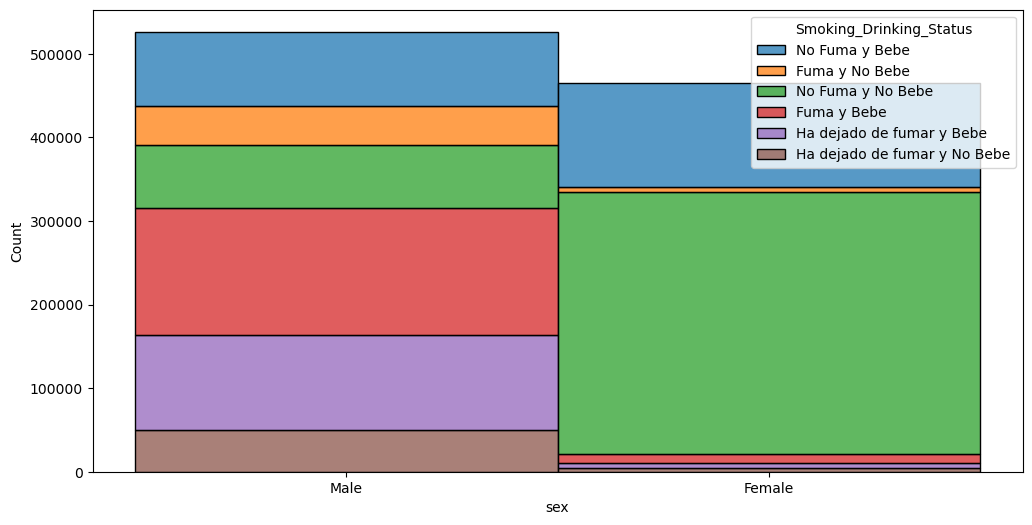

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x="sex",hue="Smoking_Drinking_Status", multiple="stack")
plt.show()    

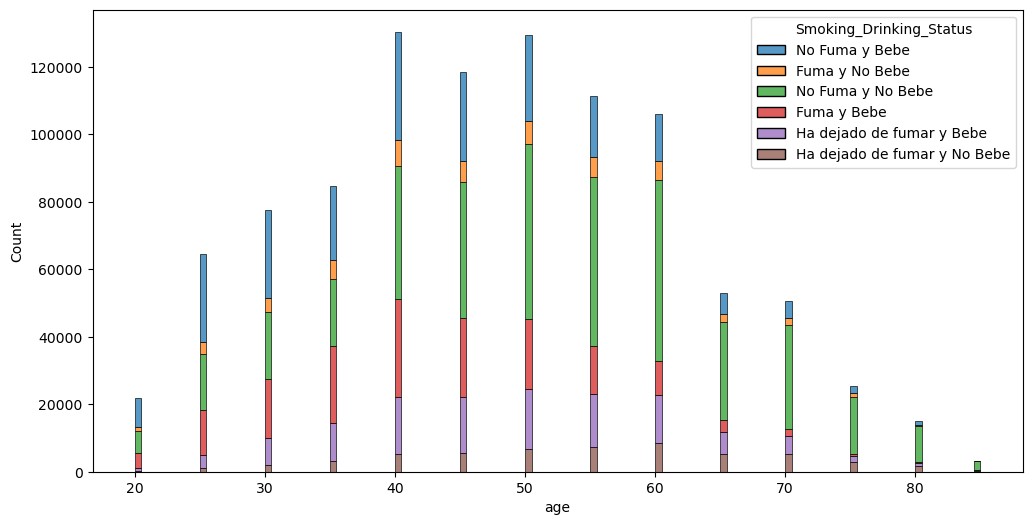

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x="age",hue="Smoking_Drinking_Status", multiple="stack")
plt.show() 

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ["sex","DRK_YN","Smoking_Drinking_Status","SMK_stat_type_cd"]
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,Smoking_Drinking_Status
0,1,35,170,75,90.0,1.0,1.0,1,1,120,...,92,17.1,1,1.0,21,35,40,0,1,4
1,1,30,180,80,89.0,0.9,1.2,1,1,130,...,121,15.8,1,0.9,20,36,27,2,0,1
2,1,40,165,75,91.0,1.2,1.5,1,1,120,...,104,15.8,1,0.9,47,32,68,0,0,5
3,1,50,175,80,91.0,1.5,1.2,1,1,145,...,106,17.6,1,1.1,29,34,18,0,0,5
4,1,50,165,60,80.0,1.0,1.2,1,1,138,...,104,13.8,1,0.8,19,12,25,0,0,5


In [58]:
#aun que SMK_stat_type_cd sea en numeros lo pongo como categorica
#para que me de valores [0,1,2] en vez de [1,2,3]

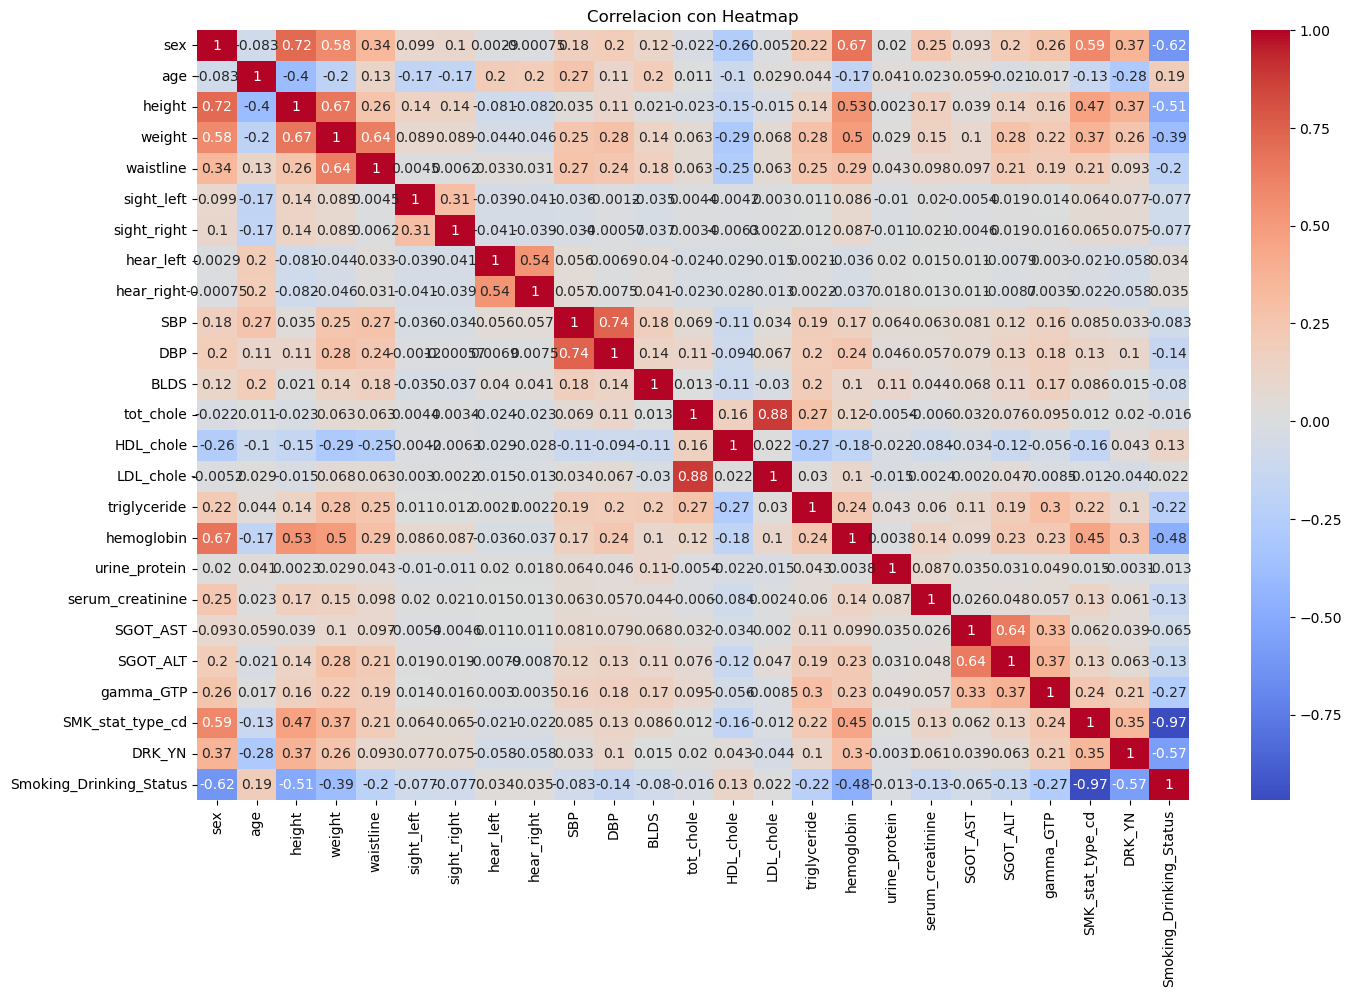

In [23]:
matriz_correlacion=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(matriz_correlacion, cmap="coolwarm", annot=True)
plt.title("Correlacion con Heatmap")
plt.show()

### Predecir Smoking_Drinking_Status

In [48]:
X = df.drop(["Smoking_Drinking_Status","SMK_stat_type_cd","DRK_YN"], axis=1) 
y = df["Smoking_Drinking_Status"]

In [18]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [51]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [52]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [53]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 52.95%


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.52     32392
           1       0.28      0.09      0.14     10450
           2       0.33      0.36      0.35     23939
           3       0.27      0.09      0.13     10920
           4       0.46      0.27      0.34     42601
           5       0.67      0.80      0.73     77968

    accuracy                           0.53    198270
   macro avg       0.41      0.38      0.37    198270
weighted avg       0.50      0.53      0.50    198270



In [32]:
from sklearn.metrics import confusion_matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5')])

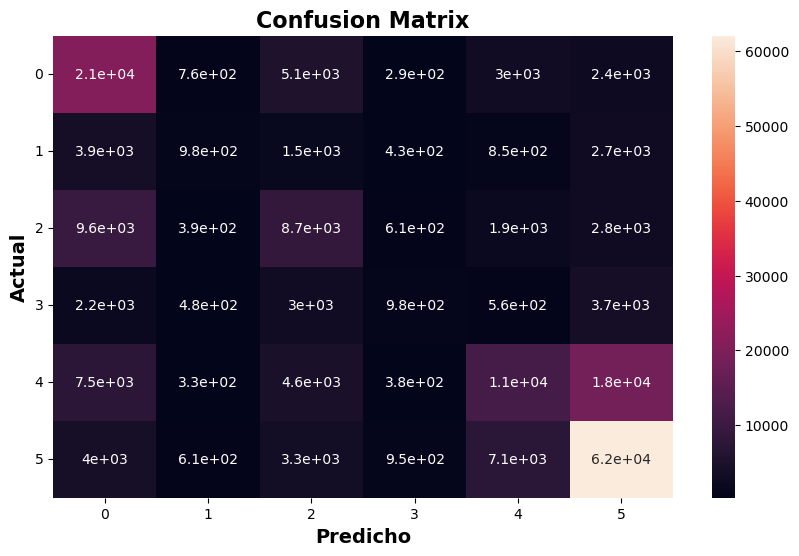

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))


sns.heatmap(cm, annot=True)

plt.xlabel('Predicho', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

### predecir SMK_stat_type_cd

In [59]:
X = df.drop(["Smoking_Drinking_Status","SMK_stat_type_cd","DRK_YN"], axis=1) 
y = df["SMK_stat_type_cd"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
model = XGBClassifier()

In [67]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [68]:
y_pred = model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 70.11%


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84    120573
           1       0.44      0.41      0.42     35047
           2       0.52      0.59      0.56     42650

    accuracy                           0.70    198270
   macro avg       0.60      0.61      0.60    198270
weighted avg       0.70      0.70      0.70    198270



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')])

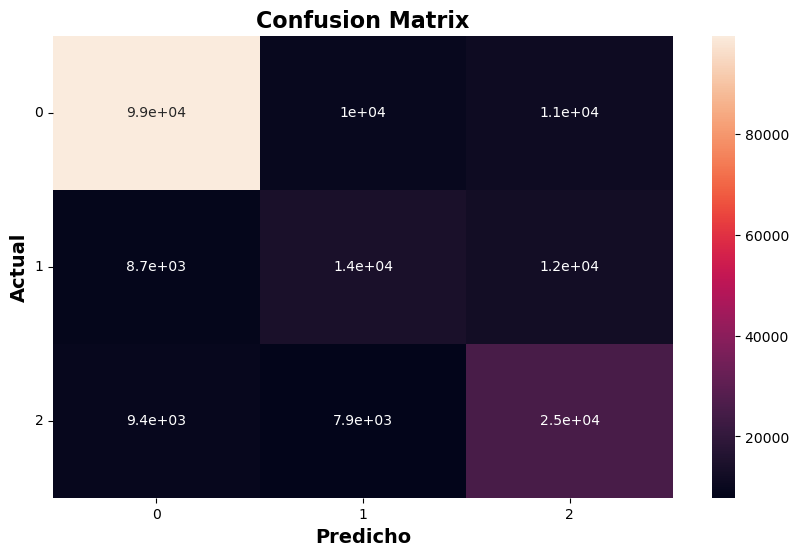

In [71]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))


sns.heatmap(cm, annot=True)

plt.xlabel('Predicho', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

### predecir DRK_YN

In [73]:
X = df.drop(["Smoking_Drinking_Status","SMK_stat_type_cd","DRK_YN"], axis=1) 
y = df["DRK_YN"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
model = XGBClassifier()

In [76]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.26%


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     99209
           1       0.73      0.74      0.74     99061

    accuracy                           0.73    198270
   macro avg       0.73      0.73      0.73    198270
weighted avg       0.73      0.73      0.73    198270



(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

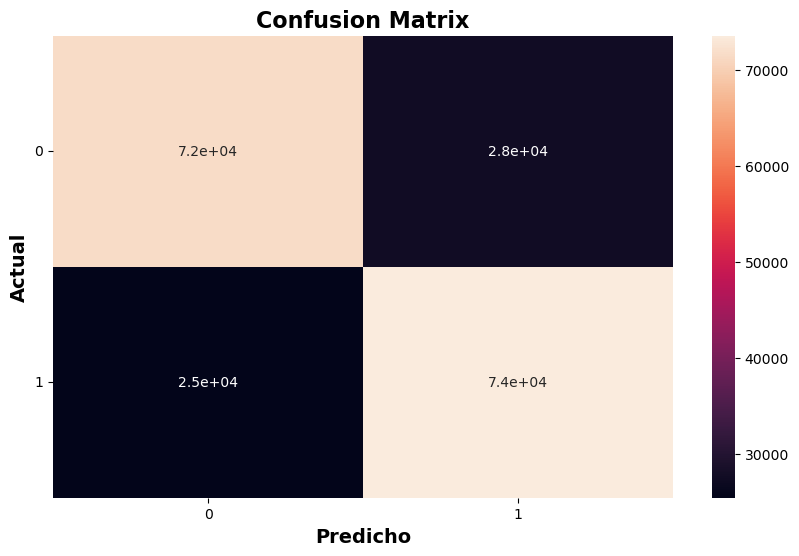

In [80]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))


sns.heatmap(cm, annot=True)

plt.xlabel('Predicho', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

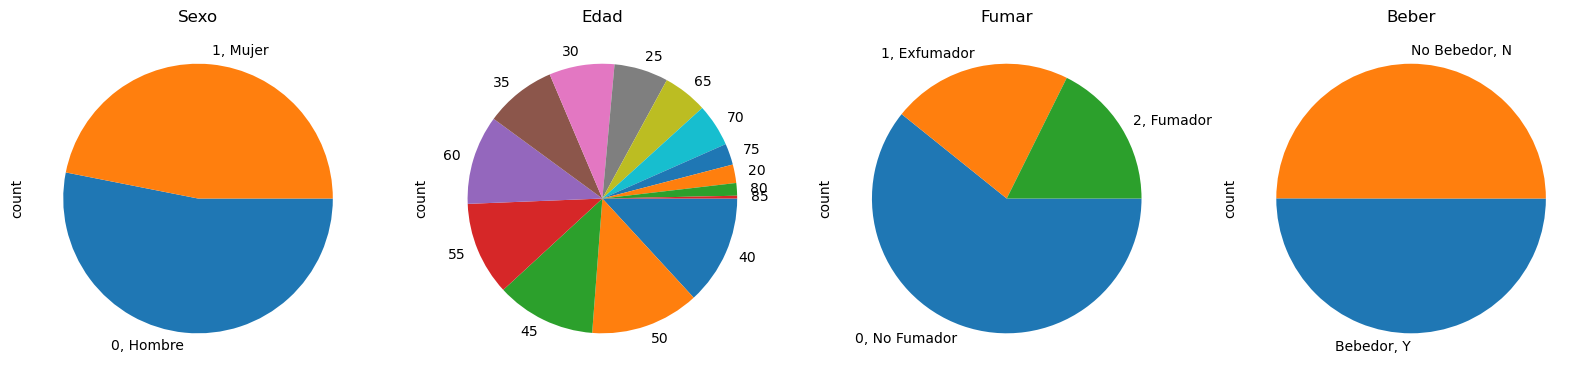

In [88]:
plt.figure(figsize=(20,20))

plt.subplot(1, 4, 1)    
labels = ["0, Hombre", "1, Mujer"]
df["sex"].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title("Sexo")

plt.subplot(1, 4, 2)    
df["age"].value_counts().plot.pie(counterclock=False)
plt.title("Edad")

plt.subplot(1, 4, 3)   
labels = ["0, No Fumador", "1, Exfumador", "2, Fumador"]
df["SMK_stat_type_cd"].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title("Fumar")

plt.subplot(1, 4, 4)    
labels = ["Bebedor, Y", "No Bebedor, N"]
df["DRK_YN"].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title("Beber")

plt.show()   